In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

%run ./scripts/util_func.py

In [2]:
# import data to dataframe

data = pd.read_csv("/home/dominic/Documents/publications/sensors2021/offline_model_training/kinematic_models_training/data/data_new.csv") 

data = data.iloc[36:]

print(data)

       Unnamed: 0      ros_time  icp_index  cmd_left_vel  meas_left_vel  \
36             36  1.602249e+18        1.0           0.0            0.0   
37             37  1.602249e+18        2.0           0.0            0.0   
38             38  1.602249e+18        3.0           0.0            0.0   
39             39  1.602249e+18        4.0           0.0            0.0   
40             40  1.602249e+18        5.0           0.0            0.0   
...           ...           ...        ...           ...            ...   
17460       17460  1.602249e+18     8717.0           0.0            0.0   
17461       17461  1.602249e+18     8718.0           0.0            0.0   
17462       17462  1.602249e+18     8718.0           0.0            0.0   
17463       17463  1.602249e+18     8719.0           0.0            0.0   
17464       17464  1.602249e+18     8719.0           0.0            0.0   

       cmd_right_vel  meas_right_vel  icp_pos_x  icp_pos_y  icp_quat_x  \
36               0.0     

In [3]:
# convert dataframe to numpy array

array = data.to_numpy()
array =np.delete(array,[0],axis=0)

time_arr = array[:,1]
time_arr = (time_arr - time_arr[0]) * 10**(-9)
icp_index_arr = array[:,2]

left_vel_cmd_arr = array[:,3]
left_vel_meas_arr = array[:,4]
right_vel_cmd_arr = array[:,5]
right_vel_meas_arr = array[:,6]

icp_pos_x_arr = array[:,7]
icp_pos_y_arr = array[:,8]

icp_quat_x_arr = array[:,9]
icp_quat_y_arr = array[:,10]
icp_quat_z_arr = array[:,11]
icp_quat_w_arr = array[:,12]


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


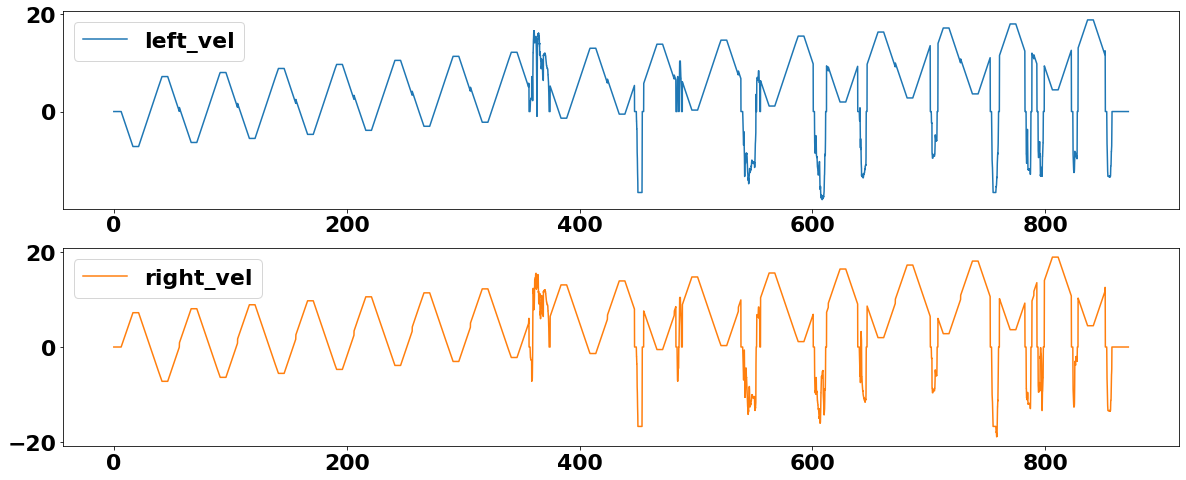

In [4]:
plt.figure(2, figsize=(20,8))
plt.subplot(211)
plt.plot(time_arr, left_vel_cmd_arr, c='tab:blue', label='left_vel')
plt.legend()
plt.subplot(212)
plt.plot(time_arr, right_vel_cmd_arr, c='tab:orange', label='right_vel')
plt.legend()

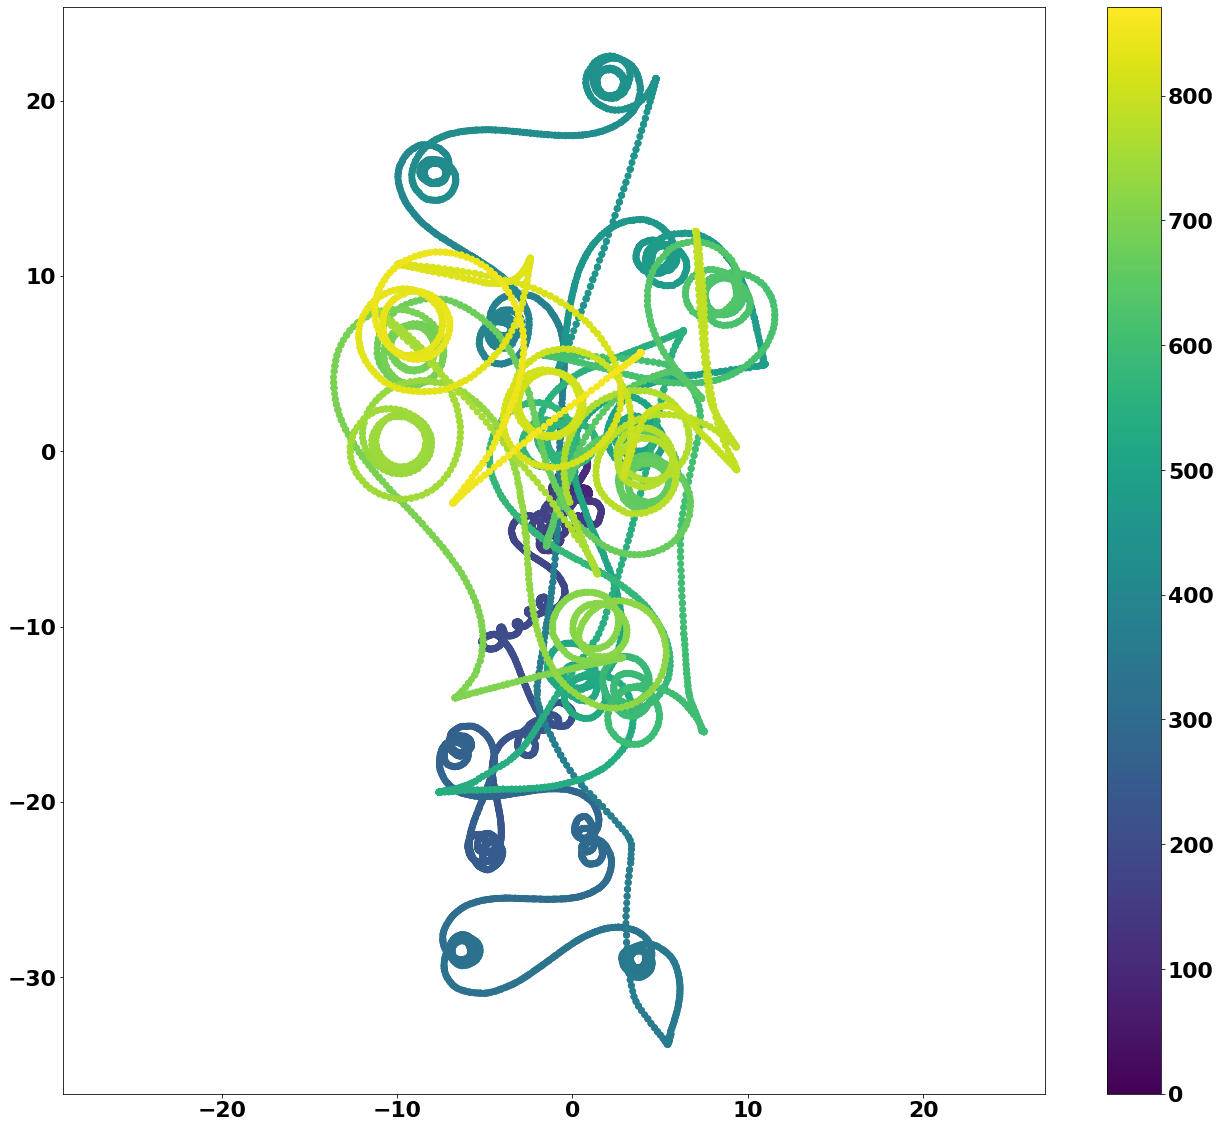

In [5]:
plt.figure(2, figsize = (22,20))
icp = plt.scatter(icp_pos_x_arr, icp_pos_y_arr, c = time_arr)
plt.colorbar(icp)
plt.axis('equal')

plt.show()

In [6]:
# Compute Euler Yaw from ICP quaternion

# quat = np.zeros((icp_z_arr.shape[0], 4))
# icp_yaw_arr = np.zeros((icp_z_arr.shape[0], 1))

# for i in range(icp_z_arr.shape[0]):
#     quat[i, 2] = icp_z_arr[i]
#     quat[i, 3] = icp_w_arr[i]
    
#     s_yaw = 2 * np.arcsin(quat[i, 2])
#     c_yaw = 2 * np.arccos(quat[i,3])
#     icp_yaw_arr[i] = np.arctan(s_yaw / c_yaw)
# #     icp_yaw_arr[i] = np.arctan2(np.arcsin2()
    
icp_quat_arr = np.column_stack((icp_quat_x_arr, icp_quat_y_arr, 
                               icp_quat_z_arr, icp_quat_w_arr))    

icp_euler_arr = np.zeros((icp_quat_arr.shape[0], 3))

for i in range(icp_quat_arr.shape[0]):
    icp_euler_arr[i,0], icp_euler_arr[i,1], icp_euler_arr[i,2] = quaternion_to_euler(icp_quat_arr[i,3], icp_quat_arr[i,0], icp_quat_arr[i,1], icp_quat_arr[i,2])

    
print(icp_euler_arr)

[[ 0.03050052 -0.03746316  0.78972365]
 [ 0.03069791 -0.03766911  0.78984009]
 [ 0.03059259 -0.03746006  0.78996472]
 ...
 [-0.02608359  0.03554479 -2.41419225]
 [-0.02605585  0.03545801 -2.41430764]
 [-0.02605585  0.03545801 -2.41430764]]


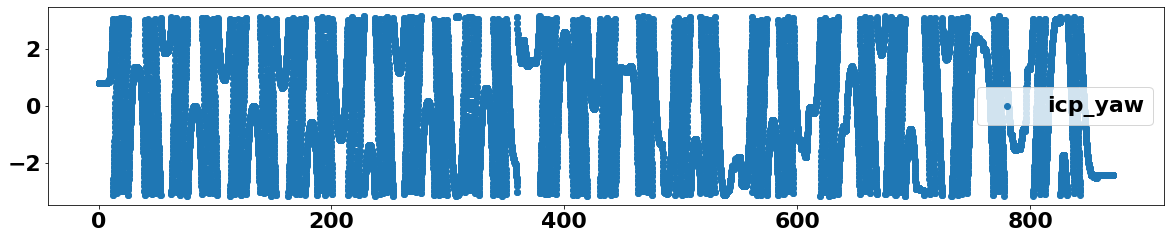

In [7]:
plt.figure(2, figsize=(20,8))
plt.subplot(211)
plt.scatter(time_arr, icp_euler_arr[:,2], c='tab:blue', label='icp_yaw')
plt.legend()

In [9]:
# Built state and input vectors

icp_states = np.column_stack((time_arr, icp_index_arr, icp_pos_x_arr, icp_pos_y_arr, icp_euler_arr[:,2]))

print(icp_states)

wheel_vels = np.column_stack((time_arr, icp_index_arr, left_vel_cmd_arr, right_vel_cmd_arr))

print(wheel_vels)

wheel_vels_meas = np.column_stack((time_arr, icp_index_arr, left_vel_meas_arr, right_vel_meas_arr))

print(wheel_vels_meas)

[[ 0.00000000e+00  2.00000000e+00  1.90564990e-03  6.57618046e-04
   7.89723646e-01]
 [ 4.63672320e-02  3.00000000e+00  4.82946634e-04 -3.39448452e-05
   7.89840095e-01]
 [ 9.66886400e-02  4.00000000e+00  4.24474478e-04 -4.95791435e-04
   7.89964715e-01]
 ...
 [ 8.71247166e+02  8.71800000e+03  3.89616919e+00  5.62076807e+00
  -2.41419225e+00]
 [ 8.71299086e+02  8.71900000e+03  3.89392924e+00  5.62077951e+00
  -2.41430764e+00]
 [ 8.71349671e+02  8.71900000e+03  3.89392924e+00  5.62077951e+00
  -2.41430764e+00]]
[[0.00000000e+00 2.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.63672320e-02 3.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.66886400e-02 4.00000000e+00 0.00000000e+00 0.00000000e+00]
 ...
 [8.71247166e+02 8.71800000e+03 0.00000000e+00 0.00000000e+00]
 [8.71299086e+02 8.71900000e+03 0.00000000e+00 0.00000000e+00]
 [8.71349671e+02 8.71900000e+03 0.00000000e+00 0.00000000e+00]]
[[0.00000000e+00 2.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.63672320e-02 3.00000000e+00 0.000

In [10]:
# export data

np.save('data/icp_states.npy', icp_states)
np.save('data/wheel_vels.npy', wheel_vels)
np.save('data/wheel_vels_meas.npy', wheel_vels_meas)


In [18]:
# compute distance traveled

dist_icp = 0

for i in range(time_arr.shape[0] - 1):
    
    dist_icp = dist_icp + comp_disp(icp_states[i+1, 2:], icp_states[i, 2:])
    
print('Distance traveled : ', dist_icp, 'm.')

Distance traveled :  2584.311675114492 m.
